In [1]:
# Defines
#=================================================#
IS_TRAIN_NOT_TEST = True

ENV_LOCAL_MACHINE   = 1
ENV_GOOGLE_COLLABS  = 2
ENV_KAGGLE          = 3
ENVIRONMENT = ENV_LOCAL_MACHINE

#=================================================#
RANDOM_SEED = 214
OVERSAMPLING_RATIO = 0.3
UNDERSAMPLING_RATIO = 0.8
N_JOBS = -1

#=================================================#
PATH_INPUT              = "dataset/creditcard/"
PATH_OUTPUT             = "outputs/creditcard/"

CSV_DATASET_RAW                     = "creditcard.csv"
CSV_DATASET_TRAIN                   = "dataset_train.csv"
CSV_DATASET_TEST                    = "dataset_test.csv"
CSV_DATASET_TRAIN_TRANSFORMED       = "dataset_train_t.csv"
CSV_DATASET_TEST_TRANSFORMED        = "dataset_test_t.csv"
CSV_DATASET_VAL_TRANSFORMED         = "dataset_val_t.csv"

CSV_DATASET_BALANCED_RUS_TRAIN      = "dataset_train_t_b_rus.csv"
CSV_DATASET_BALANCED_NM_TRAIN       = "dataset_train_t_b_nm.csv"
CSV_DATASET_BALANCED_SMOTE_TRAIN    = "dataset_train_t_b_smote.csv"
CSV_DATASET_BALANCED_ADASYN_TRAIN   = "dataset_train_t_b_adasyn.csv"
CSV_DATASET_BALANCED_TOMEK_TRAIN    = "dataset_train_t_b_tomek.csv"
CSV_DATASET_BALANCED_ENN_TRAIN      = "dataset_train_t_b_enn.csv"

CSV_DATASET_BALANCED_NM80_TOMEK30_TRAIN      = "dataset_train_t_b_nm80_tomek30.csv"
CSV_DATASET_BALANCED_NM65_TOMEK30_TRAIN      = "dataset_train_t_b_nm65_tomek30.csv"
CSV_DATASET_BALANCED_NM80_TOMEK50_TRAIN      = "dataset_train_t_b_nm80_tomek50.csv"
CSV_DATASET_BALANCED_NM90_TOMEK15_TRAIN      = "dataset_train_t_b_nm90_tomek15.csv"

CSV_DATASET_BALANCED_NM90_ENN15_TRAIN = "dataset_balanced_train_nm90_enn15.csv"
CSV_DATASET_BALANCED_NM90_ENN30_TRAIN = "dataset_balanced_train_nm90_enn30.csv"
CSV_DATASET_BALANCED_NM80_ENN30_TRAIN = "dataset_balanced_train_nm80_enn30.csv"

if ENVIRONMENT == ENV_LOCAL_MACHINE:
    PATH_DATASET_BASE  = "../"
if ENVIRONMENT == ENV_GOOGLE_COLLABS:
    PATH_DATASET_BASE  = "drive/MyDrive/UTN_Finales/[F] Aprendizaje Automatico/Repositorio/"

FEATURE_TARGET = "Class"

In [2]:
import pandas as pd
import numpy as np

from collections import Counter

%pip install imblearn

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, roc_auc_score, roc_curve, log_loss

import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import Dataset Test CSV
dataset_val = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED)
print(f"dataset_rows = {dataset_val.shape[0]}")

X_test = dataset_val.drop(FEATURE_TARGET, axis=1)
y_test = dataset_val[FEATURE_TARGET]

dataset_rows = 199364


# NM+SMOTEENN - Adaboost - Decision Tree

Weight List: 1
Log Loss: 0.305
AUC-ROC: 0.969
Weight List: 5
Log Loss: 0.579
AUC-ROC: 0.948


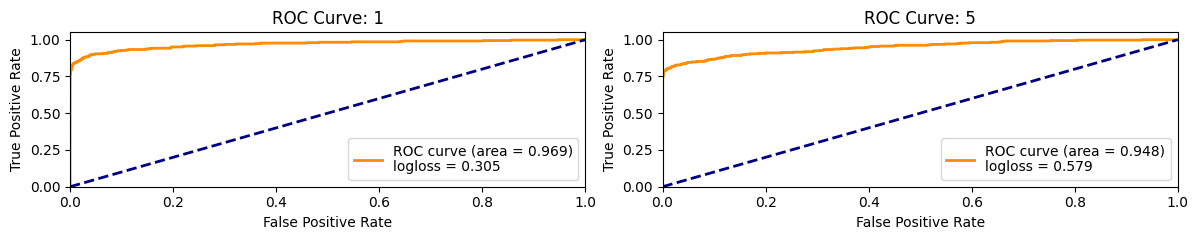

In [10]:
N_ESTIMATORS = 50
MAX_DEPTH = 5
CLASS_WEIGHT = 1
DATASET_TRAIN = CSV_DATASET_BALANCED_NM80_ENN30_TRAIN

weight_list = [
    1,
    5,
]

dataset_val = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED)
X_val = dataset_val.drop(FEATURE_TARGET, axis=1)
y_val = dataset_val[FEATURE_TARGET]

# Determine the number of rows and columns for subplots
num_cols = len(weight_list)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i in range(len(weight_list)):
    print(f"Weight List: {weight_list[i]}")
    dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+DATASET_TRAIN)
    X_train = dataset.drop(FEATURE_TARGET, axis=1)
    y_train = dataset[FEATURE_TARGET]

    class_weights = {0: 1, 1: weight_list[i]}
    sample_weight = np.array([class_weights[cls] for cls in y_train])

    model = RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=RANDOM_SEED)
    model.fit(X_train, y_train, sample_weight=sample_weight)

    y_pred_proba = model.predict_proba(X_val)[:, 1]

    logloss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {logloss:.3f}")

    roc_auc = roc_auc_score(y_val, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    print(f"AUC-ROC: {roc_auc:.3f}")

    axs[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC Curve: {weight_list[i]}')
    axs[i].legend(loc="lower right")

# Adjust layout and display
plt.tight_layout()
plt.show()

Weight List: 1
Log Loss: 0.125
AUC-ROC: 0.951
Weight List: 5
Log Loss: 0.729
AUC-ROC: 0.916


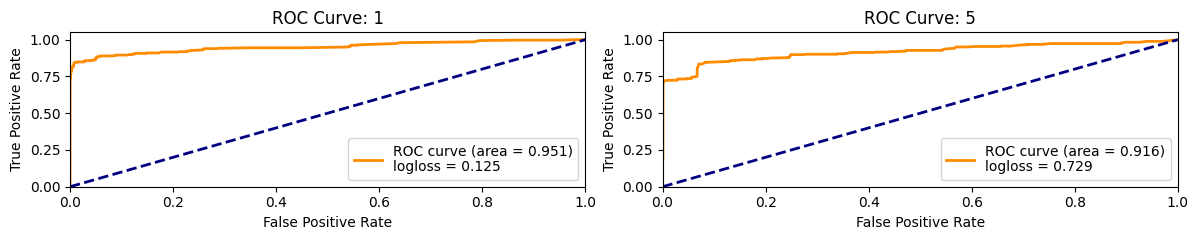

In [8]:
N_ESTIMATORS = 5
MAX_DEPTH = 5
CLASS_WEIGHT = 1
DATASET_TRAIN = CSV_DATASET_BALANCED_NM80_ENN30_TRAIN

weight_list = [
    1,
    5,
]

dataset_val = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED)
X_val = dataset_val.drop(FEATURE_TARGET, axis=1)
y_val = dataset_val[FEATURE_TARGET]

# Determine the number of rows and columns for subplots
num_cols = len(weight_list)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i in range(len(weight_list)):
    print(f"Weight List: {weight_list[i]}")
    dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+DATASET_TRAIN)
    X_train = dataset.drop(FEATURE_TARGET, axis=1)
    y_train = dataset[FEATURE_TARGET]

    class_weights = {0: 1, 1: weight_list[i]}
    sample_weight = np.array([class_weights[cls] for cls in y_train])

    model = RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=RANDOM_SEED)
    model.fit(X_train, y_train, sample_weight=sample_weight)

    y_pred_proba = model.predict_proba(X_val)[:, 1]

    logloss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {logloss:.3f}")

    roc_auc = roc_auc_score(y_val, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    print(f"AUC-ROC: {roc_auc:.3f}")

    axs[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC Curve: {weight_list[i]}')
    axs[i].legend(loc="lower right")

# Adjust layout and display
plt.tight_layout()
plt.show()

Weight List: 1
Log Loss: 0.509
AUC-ROC: 0.943
Weight List: 5
Log Loss: 1.227
AUC-ROC: 0.937


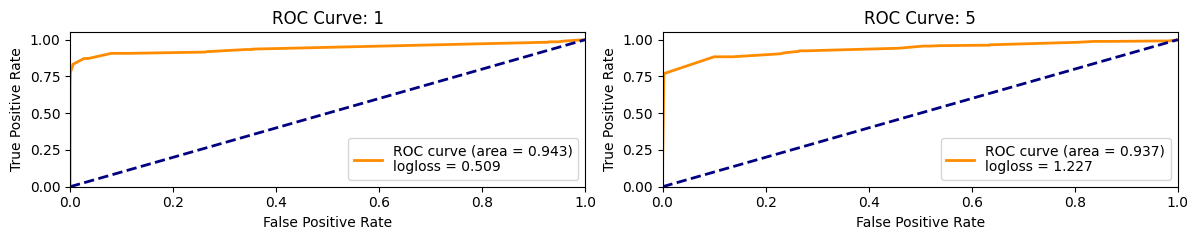

In [9]:
N_ESTIMATORS = 15
MAX_DEPTH = 1
CLASS_WEIGHT = 1
DATASET_TRAIN = CSV_DATASET_BALANCED_NM80_ENN30_TRAIN

weight_list = [
    1,
    5,
]

dataset_val = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED)
X_val = dataset_val.drop(FEATURE_TARGET, axis=1)
y_val = dataset_val[FEATURE_TARGET]

# Determine the number of rows and columns for subplots
num_cols = len(weight_list)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i in range(len(weight_list)):
    print(f"Weight List: {weight_list[i]}")
    dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+DATASET_TRAIN)
    X_train = dataset.drop(FEATURE_TARGET, axis=1)
    y_train = dataset[FEATURE_TARGET]

    class_weights = {0: 1, 1: weight_list[i]}
    sample_weight = np.array([class_weights[cls] for cls in y_train])

    model = RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=RANDOM_SEED)
    model.fit(X_train, y_train, sample_weight=sample_weight)

    y_pred_proba = model.predict_proba(X_val)[:, 1]

    logloss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {logloss:.3f}")

    roc_auc = roc_auc_score(y_val, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    print(f"AUC-ROC: {roc_auc:.3f}")

    axs[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC Curve: {weight_list[i]}')
    axs[i].legend(loc="lower right")

# Adjust layout and display
plt.tight_layout()
plt.show()

## Boosting

Weight List: 1


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.007
AUC-ROC: 0.950
Weight List: 3


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.009
AUC-ROC: 0.950
Weight List: 5


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.012
AUC-ROC: 0.937
Weight List: 10


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.008
AUC-ROC: 0.949


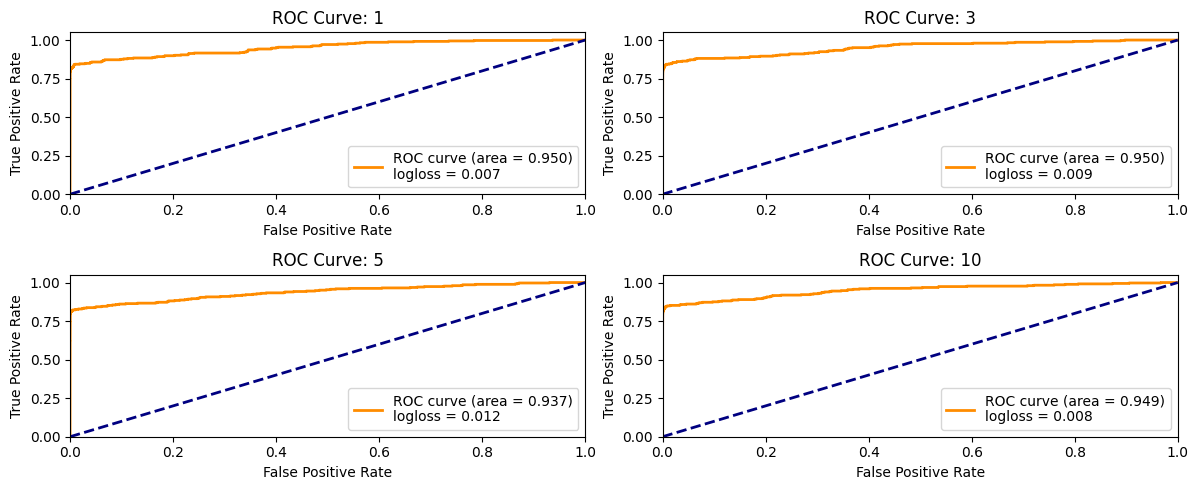

In [11]:
N_ESTIMATORS = 50
MAX_DEPTH = 5
DATASET_TRAIN = CSV_DATASET_TRAIN_TRANSFORMED

weight_list = [
    1,
    3,
    5,
    10
]

dataset_val = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED)
X_val = dataset_val.drop(FEATURE_TARGET, axis=1)
y_val = dataset_val[FEATURE_TARGET]

# Determine the number of rows and columns for subplots
num_cols = len(weight_list)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i in range(len(weight_list)):
    print(f"Weight List: {weight_list[i]}")
    dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+DATASET_TRAIN)
    X_train = dataset.drop(FEATURE_TARGET, axis=1)
    y_train = dataset[FEATURE_TARGET]

    class_weights = {0: 1, 1: weight_list[i]}
    sample_weight = np.array([class_weights[cls] for cls in y_train])

    base_model = DecisionTreeClassifier(max_depth=MAX_DEPTH)
    model = AdaBoostClassifier(estimator=base_model, n_estimators=N_ESTIMATORS, random_state=RANDOM_SEED)
    model.fit(X_train, y_train, sample_weight=sample_weight)

    y_pred_proba = model.predict_proba(X_val)[:, 1]

    logloss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {logloss:.3f}")

    roc_auc = roc_auc_score(y_val, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    print(f"AUC-ROC: {roc_auc:.3f}")

    axs[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC Curve: {weight_list[i]}')
    axs[i].legend(loc="lower right")

# Adjust layout and display
plt.tight_layout()
plt.show()

Weight List: 1


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.351
AUC-ROC: 0.904
Weight List: 3


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.972
AUC-ROC: 0.927
Weight List: 5


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.020
AUC-ROC: 0.938
Weight List: 10


d:\Program Files\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Log Loss: 0.099
AUC-ROC: 0.932


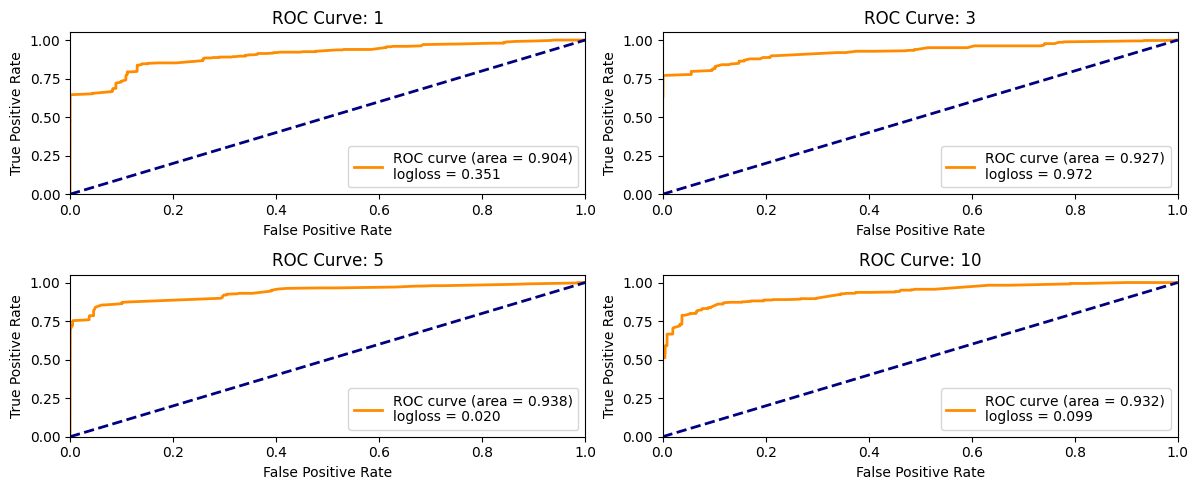

In [13]:
N_ESTIMATORS = 5
MAX_DEPTH = 5
DATASET_TRAIN = CSV_DATASET_TRAIN_TRANSFORMED

weight_list = [
    1,
    3,
    5,
    10
]

dataset_val = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED)
X_val = dataset_val.drop(FEATURE_TARGET, axis=1)
y_val = dataset_val[FEATURE_TARGET]

# Determine the number of rows and columns for subplots
num_cols = len(weight_list)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i in range(len(weight_list)):
    print(f"Weight List: {weight_list[i]}")
    dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+DATASET_TRAIN)
    X_train = dataset.drop(FEATURE_TARGET, axis=1)
    y_train = dataset[FEATURE_TARGET]

    class_weights = {0: 1, 1: weight_list[i]}
    sample_weight = np.array([class_weights[cls] for cls in y_train])

    base_model = DecisionTreeClassifier(max_depth=MAX_DEPTH)
    model = AdaBoostClassifier(estimator=base_model, n_estimators=N_ESTIMATORS, random_state=RANDOM_SEED)
    model.fit(X_train, y_train, sample_weight=sample_weight)

    y_pred_proba = model.predict_proba(X_val)[:, 1]

    logloss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {logloss:.3f}")

    roc_auc = roc_auc_score(y_val, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    print(f"AUC-ROC: {roc_auc:.3f}")

    axs[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC Curve: {weight_list[i]}')
    axs[i].legend(loc="lower right")

# Adjust layout and display
plt.tight_layout()
plt.show()

# Bagging - Random Forest

Weight List: 1
Log Loss: 0.089
AUC-ROC: 0.935
Weight List: 3
Log Loss: 0.101
AUC-ROC: 0.950
Weight List: 5
Log Loss: 0.106
AUC-ROC: 0.943
Weight List: 10
Log Loss: 0.140
AUC-ROC: 0.947


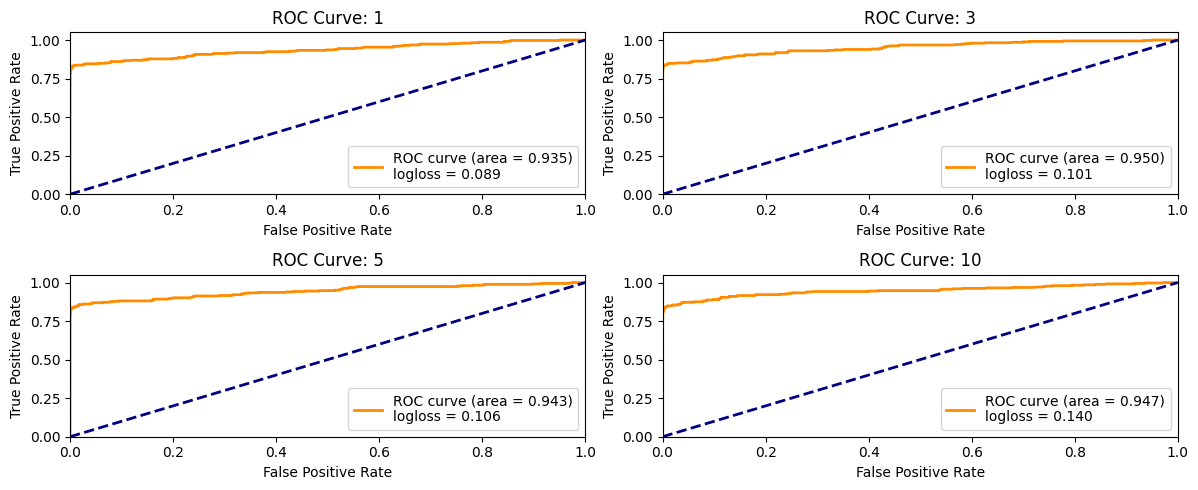

In [14]:
N_ESTIMATORS = 50
MAX_DEPTH = 5
DATASET_TRAIN = CSV_DATASET_TRAIN_TRANSFORMED

weight_list = [
    1,
    3,
    5,
    10
]

dataset_val = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED)
X_val = dataset_val.drop(FEATURE_TARGET, axis=1)
y_val = dataset_val[FEATURE_TARGET]

# Determine the number of rows and columns for subplots
num_cols = len(weight_list)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i in range(len(weight_list)):
    print(f"Weight List: {weight_list[i]}")
    dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+DATASET_TRAIN)
    X_train = dataset.drop(FEATURE_TARGET, axis=1)
    y_train = dataset[FEATURE_TARGET]

    class_weights = {0: 1, 1: weight_list[i]}
    sample_weight = np.array([class_weights[cls] for cls in y_train])

    model = RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=RANDOM_SEED)
    model.fit(X_train, y_train, sample_weight=sample_weight)

    y_pred_proba = model.predict_proba(X_val)[:, 1]

    logloss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {logloss:.3f}")

    roc_auc = roc_auc_score(y_val, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    print(f"AUC-ROC: {roc_auc:.3f}")

    axs[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC Curve: {weight_list[i]}')
    axs[i].legend(loc="lower right")

# Adjust layout and display
plt.tight_layout()
plt.show()

Weight List: 1
Log Loss: 0.025
AUC-ROC: 0.927
Weight List: 3
Log Loss: 0.023
AUC-ROC: 0.928
Weight List: 5
Log Loss: 0.039
AUC-ROC: 0.932
Weight List: 10
Log Loss: 0.038
AUC-ROC: 0.947


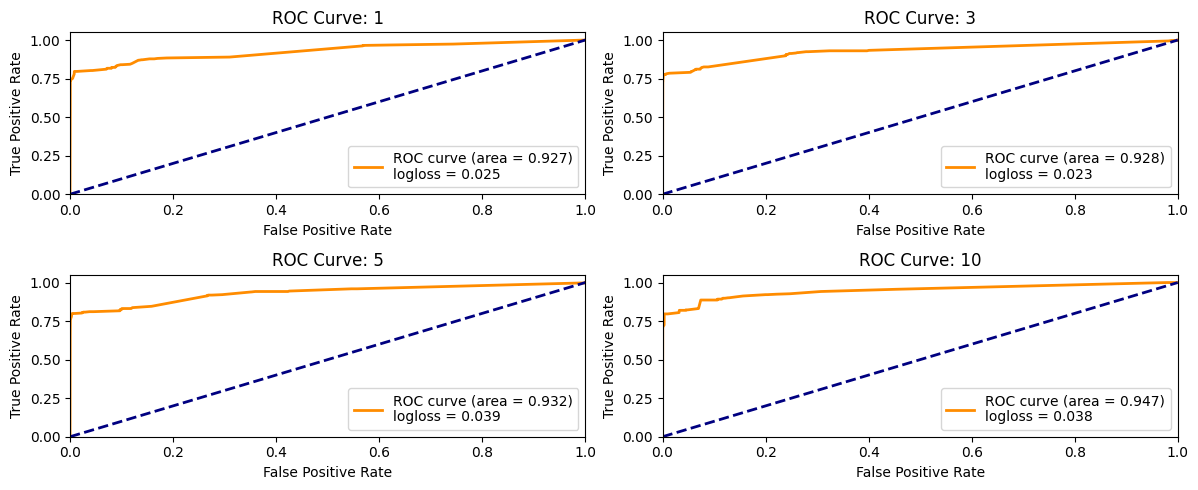

In [15]:
N_ESTIMATORS = 5
MAX_DEPTH = 5
DATASET_TRAIN = CSV_DATASET_TRAIN_TRANSFORMED

weight_list = [
    1,
    3,
    5,
    10
]

dataset_val = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED)
X_val = dataset_val.drop(FEATURE_TARGET, axis=1)
y_val = dataset_val[FEATURE_TARGET]

# Determine the number of rows and columns for subplots
num_cols = len(weight_list)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i in range(len(weight_list)):
    print(f"Weight List: {weight_list[i]}")
    dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+DATASET_TRAIN)
    X_train = dataset.drop(FEATURE_TARGET, axis=1)
    y_train = dataset[FEATURE_TARGET]

    class_weights = {0: 1, 1: weight_list[i]}
    sample_weight = np.array([class_weights[cls] for cls in y_train])

    model = RandomForestClassifier(n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH, random_state=RANDOM_SEED)
    model.fit(X_train, y_train, sample_weight=sample_weight)

    y_pred_proba = model.predict_proba(X_val)[:, 1]

    logloss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {logloss:.3f}")

    roc_auc = roc_auc_score(y_val, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    print(f"AUC-ROC: {roc_auc:.3f}")

    axs[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}')
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC Curve: {weight_list[i]}')
    axs[i].legend(loc="lower right")

# Adjust layout and display
plt.tight_layout()
plt.show()